<a href="https://colab.research.google.com/github/FariaParvinMegha/Final_thesis_arousal/blob/main/Arousal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git

!pip install keras-self-attention

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-yexoq5zt
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-yexoq5zt
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28111 sha256=fed3c40779f9993c997020b91fd51660e9ec98f70ff3742d0bb5dc382fd61f31
  Stored in directory: /tmp/pip-ephem-wheel-cache-q7bdq7w5/wheels/a8/c4/1a/cee09dcc12a11620066d35ace42e3c1e3bfbcc1db3a0ce7788
Successfully built pyeeg
  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18894 sha256=10e146c61acae8eff86cfbe249bb58c801ffc0bfd70f9452e593bc34f06211bc
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built kera

In [ ]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import svm
import tensorflow as tf
import os
import time
import keras
import keras.backend as K

import tensorflow as tf
from tensorflow import keras
from keras.metrics import Precision, Recall
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv1D
from keras.models import Model
from keras.utils import plot_model

import timeit
from keras.layers import MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense,GRU,SpatialDropout1D,Bidirectional
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras_self_attention import SeqSelfAttention
from keras.layers import (Input, Embedding, Conv1D, Activation, GlobalMaxPooling1D, BatchNormalization,
                          Concatenate, LSTM, Flatten, Dropout, Dense)

from keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp

In [ ]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [ ]:
np.load = np_load_old

TRAINING

In [ ]:
with open('/content/drive/MyDrive/data_training/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_training/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)


X = normalize(X)
Z = np.ravel(Y[:, [0]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Dominance_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

for i in range(len(Z)):
  if Z[i] == 9:
    Z[i] = 8.99

In [ ]:
A=np.copy(Z)

In [ ]:
# AROUSAL classes
negative = 0
neutral = 0
positive = 0
for i in range(len(A)):
  if A[i] >= 1 and A[i]<=2.99:
    A [i] = 1
    negative = negative + 1
  if A[i] >= 3 and A[i]<=5.99:
    A [i] = 2
    neutral = neutral + 1
  if A[i] >= 6 and A[i]<=8.99:
    A [i] = 3
    positive = positive + 1

print(negative,neutral, positive)

84328 202262 213122


In [ ]:
x_train = np.array(X[:])

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(A)
y_train = y_train[:,1:]
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

VAALIDATION

In [ ]:
with open('/content/drive/MyDrive/data_validation/data_validation.npy', 'rb') as fileTrain:
    P  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_validation/label_validation.npy', 'rb') as fileTrainL:
    Q  = np.load(fileTrainL)

P = normalize(P)
R = np.ravel(Q[:, [0]])

Arousal_val = np.ravel(Q[:, [0]])
Valence_val = np.ravel(Q[:, [1]])
Domain_val = np.ravel(Q[:, [2]])
Like_val = np.ravel(Q[:, [3]])

for i in range(len(R)):
  if R[i] == 9:
    R[i] = 8.99

In [ ]:
B=np.copy(R)

In [ ]:
# AROUSAL classes
negative_val = 0
neutral_val = 0
positive_val = 0
for i in range(len(B)):
  if B[i] >= 1 and B[i]<=2.99:
    B [i] = 1
    negative_val = negative_val + 1
  if B[i] >= 3 and B[i]<=5.99:
    B [i] = 2
    neutral_val = neutral_val + 1
  if B[i] >= 6 and B[i]<=8.99:
    B [i] = 3
    positive_val = positive_val + 1

print(negative_val,neutral_val, positive_val)

10540 25261 26663


In [ ]:
x_val = np.array(P[:])

In [ ]:
from keras.utils import to_categorical
y_val = to_categorical(B)
y_val = y_val[:,1:]
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

TESTING

In [ ]:
with open('/content/drive/MyDrive/data_testing/data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_testing/label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [0]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Dominance_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

for i in range(len(L)):
  if L[i] == 9:
    L[i] = 8.99

In [ ]:
C=np.copy(L)

In [ ]:
# AROUSAL classes
negative_test = 0
neutral_test = 0
positive_test = 0
for i in range(len(C)):
  if C[i] >= 1 and C[i]<=2.99:
    C [i] = 1
    negative_test = negative_test + 1
  if C[i] >= 3 and C[i]<=5.99:
    C [i] = 2
    neutral_test = neutral_test + 1
  if C[i] >= 6 and C[i]<=8.99:
    C [i] = 3
    positive_test = positive_test + 1

print(negative_test,neutral_test, positive_test)

10540 25261 26663


In [ ]:
x_test = np.array(M[:])

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(C)
y_test = y_test[:,1:]
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(499712, 3)
(62464, 3)
(62464, 3)


In [ ]:
batch_size = 256
num_classes = 3
epochs = 50
input_shape=(x_train.shape[1], 1)

In [ ]:
print(input_shape)

(75, 1)


MATRICES

In [ ]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight=sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight=sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

Model CNN

In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense,GRU,SpatialDropout1D,Bidirectional
from keras.regularizers import l2

In [ ]:
modelCNN = Sequential()

intput_shape=(x_train.shape[1], 1)

modelCNN.add(Conv1D(1024, kernel_size=9,padding = 'same',activation='relu', input_shape=input_shape))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=(2)))

modelCNN.add(Conv1D(512,kernel_size=6,padding = 'same', activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=(2)))

modelCNN.add(Conv1D(256,kernel_size=6,padding = 'same', activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=(2)))

modelCNN.add(Conv1D(128,kernel_size=6,padding = 'same', activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=(2)))

modelCNN.add(Flatten())

modelCNN.add(Dense(1024, activation='relu'))
modelCNN.add(Dropout(0.2))

modelCNN.add(Dense(256, activation='relu'))
modelCNN.add(Dropout(0.2))

modelCNN.add(Dense(64, activation='relu'))
modelCNN.add(Dropout(0.2))

modelCNN.add(Dense(num_classes, activation='softmax'))
modelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 75, 1024)          10240     
                                                                 
 batch_normalization (Batch  (None, 75, 1024)          4096      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 37, 1024)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 512)           3146240   
                                                                 
 batch_normalization_1 (Bat  (None, 37, 512)           2048      
 chNormalization)                                                
                                                        

In [ ]:
modelCNN.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy', Precision(), F1Score()]
)

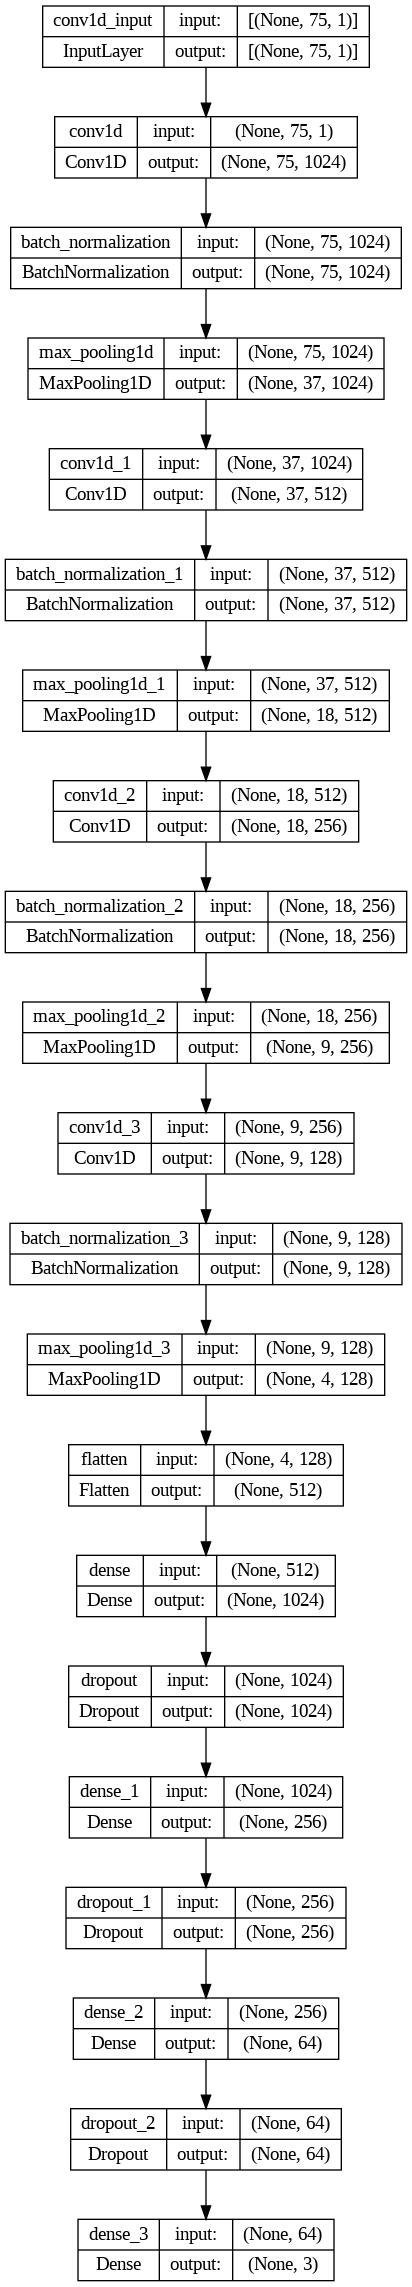

In [ ]:
from keras.utils import plot_model
plot_model(modelCNN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
model_name = "CNN_model"
directory_path = "/content/drive/MyDrive/Final work"
weights_filename = "weights-improvement_" + model_name + ".hdf5"
os.makedirs(directory_path, exist_ok=True)

# Complete file path for the model weights
filepath_CLB = os.path.join(directory_path, weights_filename)
print("Model weights will be saved to:", filepath_CLB)

checkpoint = ModelCheckpoint(filepath_CLB, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Combine all callbacks in a list
callbacks_list = [es, checkpoint, reduce_lr]

Model weights will be saved to: /content/drive/MyDrive/Final work/weights-improvement_CNN_model.hdf5


In [ ]:
FCNNmodel = modelCNN.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks= callbacks_list)

Epoch 1/50
1952/1952 [==============================] - ETA: 0s - loss: 0.8520 - accuracy: 0.5783 - precision: 0.6609 - f1_score: 0.5056
Epoch 1: val_accuracy improved from -inf to 0.62899, saving model to /content/drive/MyDrive/Final work/weights-improvement_CNN_model.hdf5
1952/1952 [==============================] - 182s 84ms/step - loss: 0.8520 - accuracy: 0.5783 - precision: 0.6609 - f1_score: 0.5056 - val_loss: 0.7572 - val_accuracy: 0.6290 - val_precision: 0.7062 - val_f1_score: 0.5963 - lr: 0.0010
Epoch 2/50
1952/1952 [==============================] - ETA: 0s - loss: 0.7177 - accuracy: 0.6600 - precision: 0.7306 - f1_score: 0.6277
Epoch 2: val_accuracy improved from 0.62899 to 0.69859, saving model to /content/drive/MyDrive/Final work/weights-improvement_CNN_model.hdf5
1952/1952 [==============================] - 169s 87ms/step - loss: 0.7177 - accuracy: 0.6600 - precision: 0.7306 - f1_score: 0.6277 - val_loss: 0.6456 - val_accuracy: 0.6986 - val_precision: 0.7650 - val_f1_scor

In [ ]:
score_CNN = modelCNN.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_CNN[0])
print('Test accuracy:', score_CNN[1])
print('Test precision:', score_CNN[2])
print('Test f1_score:', score_CNN[3])

1952/1952 [==============================] - 13s 6ms/step - loss: 0.2869 - accuracy: 0.9326 - precision: 0.9342 - f1_score: 0.9328
Test loss: 0.2868868112564087
Test accuracy: 0.9325851798057556
Test precision: 0.9342369437217712
Test f1_score: 0.9327763319015503


In [ ]:
# Plot training & validation accuracy values
plt.plot(FCNNmodel.history['accuracy'])
plt.plot(FCNNmodel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(FCNNmodel.history['loss'])
plt.plot(FCNNmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1952/1952 [==============================] - 16s 8ms/step


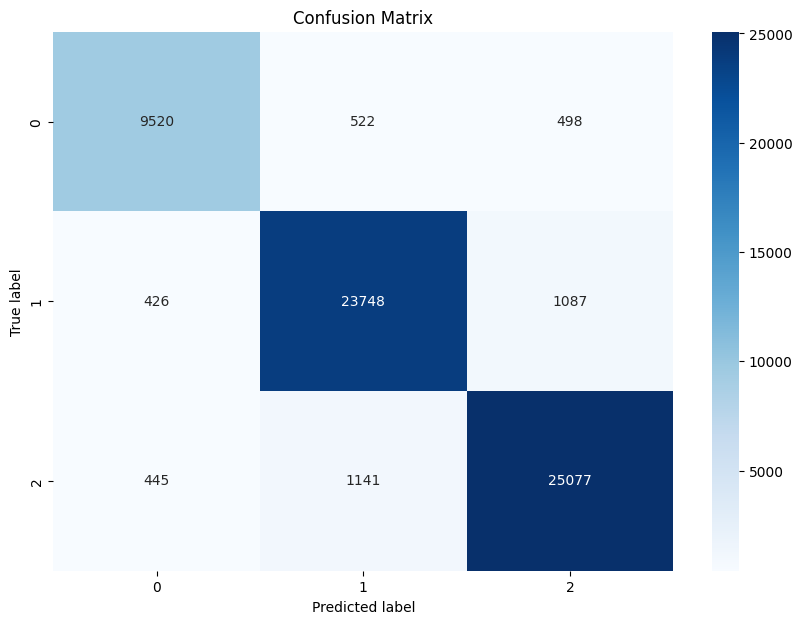

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot encoded predictions and labels to class indices
y_pred_classes = np.argmax(modelCNN.predict(x_val), axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

1952/1952 [==============================] - 8s 4ms/step


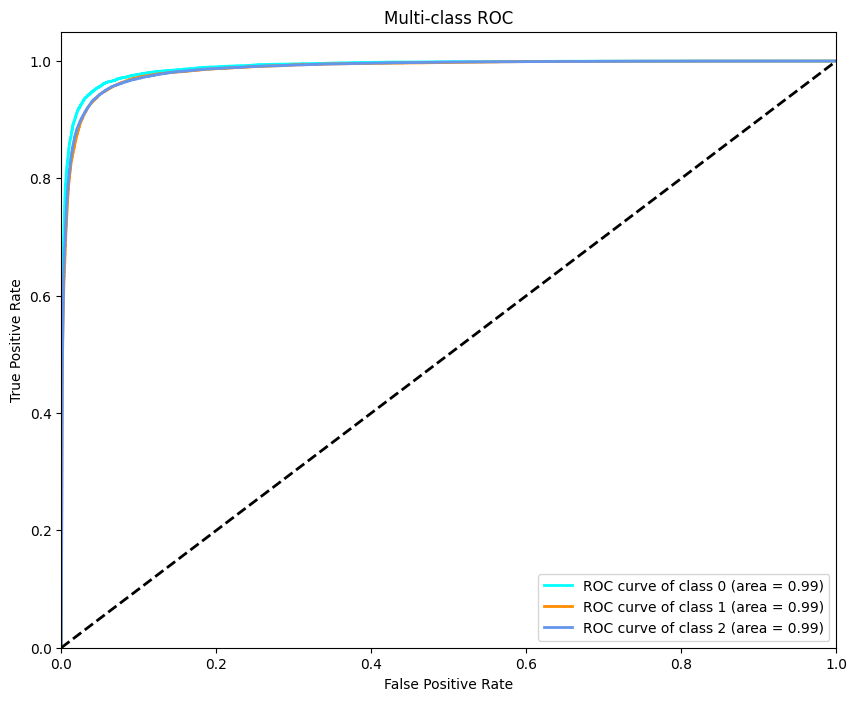

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp

# Assuming `model` is your trained CNN model
# `X_test` is your test data, `y_test` are your true labels (as integers 0, 1, 2 for negative, neutral, positive)

# Binarize the labels for ROC calculation
y_test_binarized = label_binarize(y_test, classes=[negative, neutral, positive])
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_score = modelCNN.predict(x_test)  # Ensure this gives you the probability for each class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
base_path_model = "/content/drive/MyDrive/Thesis/"
accuracy = "_93"
path_modelCNN = base_path_model + model_name + accuracy + ".h5"
modelCNN.save(path_modelCNN)
print(path_modelCNN)

/content/drive/MyDrive/Thesis/CNN_model_93.h5


Model CNN+BiLSTM

In [ ]:
model_HB = Sequential()

intput_shape=(x_train.shape[1], 1)

model_HB.add(Conv1D(1024, kernel_size=9,padding = 'same',activation='relu', input_shape=input_shape))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(512,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(256,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(128,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))


model_HB.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

# model_HB.add(LSTM(units=128,return_sequences=True))
# model_HB.add(SeqSelfAttention(attention_activation='tanh'))
# model_HB.add(Dropout(0.2))

model_HB.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))

model_HB.add(GRU(units = 512, return_sequences = True))
model_HB.add(GRU(units = 256, return_sequences = True))
model_HB.add(GRU(units = 128, return_sequences = True))

model_HB.add(Flatten())

model_HB.add(Dense(1024, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(256, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(64, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(num_classes, activation='softmax'))

model_HB.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 75, 1024)          10240     
                                                                 
 batch_normalization_4 (Bat  (None, 75, 1024)          4096      
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 37, 1024)          0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 37, 512)           3146240   
                                                                 
 batch_normalization_5 (Bat  (None, 37, 512)           2048      
 chNormalization)                                                
                                                      

In [ ]:
model_HB.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy', Precision(), F1Score()]
)

In [ ]:
model_name = "FHybrid_model"
directory_path = "/content/drive/MyDrive/Final work"
weights_filename = "weights-improvement_" + model_name + ".hdf5"
os.makedirs(directory_path, exist_ok=True)

# Complete file path for the model weights
filepath_CLB = os.path.join(directory_path, weights_filename)
print("Model weights will be saved to:", filepath_CLB)

checkpoint = ModelCheckpoint(filepath_CLB, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Combine all callbacks in a list
callbacks_list = [es, checkpoint, reduce_lr]

Model weights will be saved to: /content/drive/MyDrive/Final work/weights-improvement_FHybrid_model.hdf5


In [ ]:
FHybridmodel = model_HB.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks= callbacks_list)

Epoch 1/10
1952/1952 [==============================] - ETA: 0s - loss: 0.8333 - accuracy: 0.5910 - precision_2: 0.6692 - f1_score: 0.5301
Epoch 1: val_accuracy improved from -inf to 0.64554, saving model to /content/drive/MyDrive/Final work/weights-improvement_FHybrid_model.hdf5
1952/1952 [==============================] - 219s 103ms/step - loss: 0.8333 - accuracy: 0.5910 - precision_2: 0.6692 - f1_score: 0.5301 - val_loss: 0.7431 - val_accuracy: 0.6455 - val_precision_2: 0.7229 - val_f1_score: 0.6031 - lr: 0.0010
Epoch 2/10
1952/1952 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.6825 - precision_2: 0.7422 - f1_score: 0.6597
Epoch 2: val_accuracy improved from 0.64554 to 0.71027, saving model to /content/drive/MyDrive/Final work/weights-improvement_FHybrid_model.hdf5
1952/1952 [==============================] - 195s 100ms/step - loss: 0.6814 - accuracy: 0.6825 - precision_2: 0.7422 - f1_score: 0.6597 - val_loss: 0.6266 - val_accuracy: 0.7103 - val_precision_2

In [ ]:
score_Hybrid = model_HB.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_Hybrid[0])
print('Test accuracy:', score_Hybrid[1])
print('Test precision:', score_Hybrid[2])
print('Test f1_score:', score_Hybrid[3])

1952/1952 [==============================] - 52s 23ms/step - loss: 0.3635 - accuracy: 0.9172 - precision: 0.9188 - f1_score: 0.9173
Test loss: 0.36352401971817017
Test accuracy: 0.9171522855758667
Test precision: 0.9187934398651123
Test f1_score: 0.9172980189323425


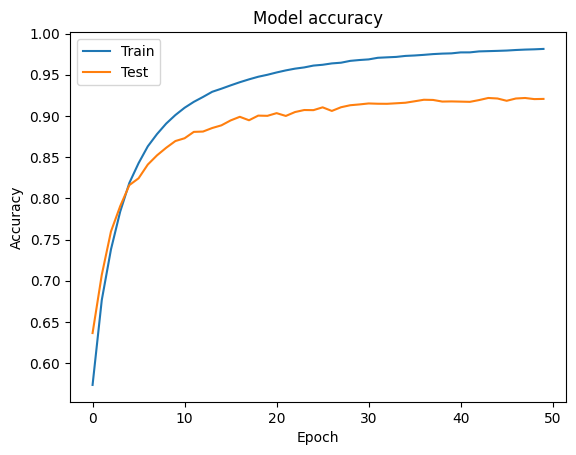

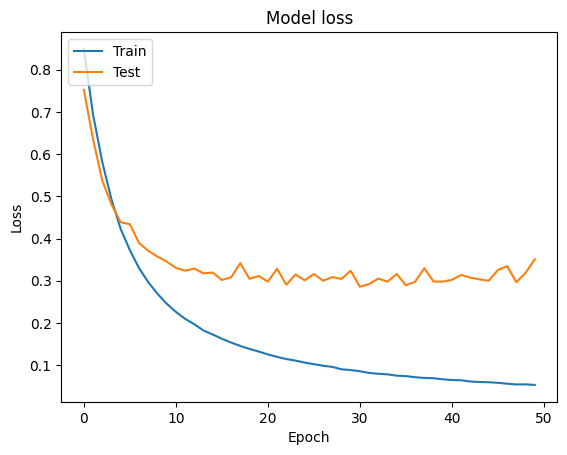

In [ ]:
# Plot training & validation accuracy values
plt.plot(FHybridmodel.history['accuracy'])
plt.plot(FHybridmodel.history['val_accuracy'])
# plt.plot(FCNNmodel.history['accuracy'])
# plt.plot(FCNNmodel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(FHybridmodel.history['loss'])
plt.plot(FHybridmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1952/1952 [==============================] - 17s 7ms/step


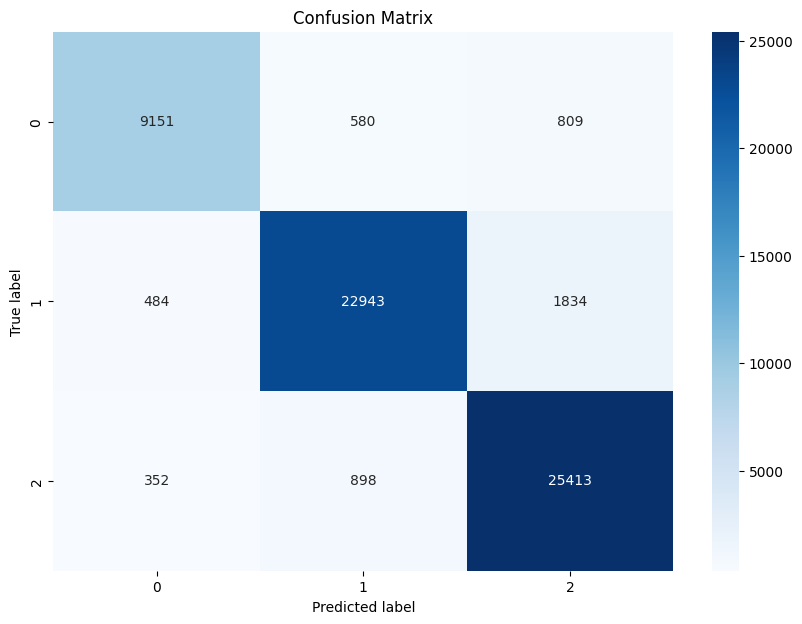

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot encoded predictions and labels to class indices
y_pred_classes = np.argmax(model_HB.predict(x_val), axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

1952/1952 [==============================] - 17s 8ms/step


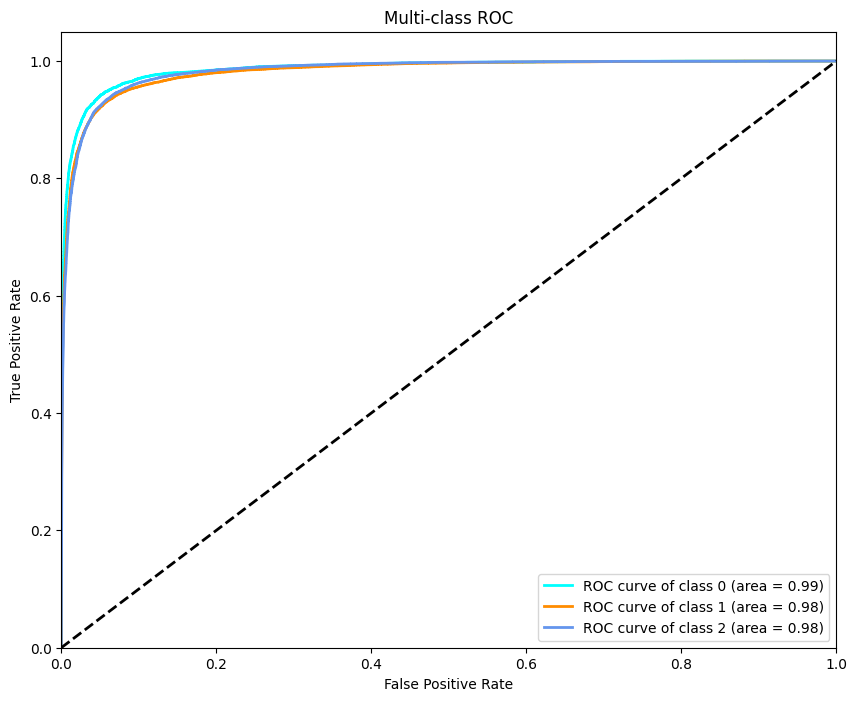

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp

# Assuming `model` is your trained CNN model
# `X_test` is your test data, `y_test` are your true labels (as integers 0, 1, 2 for negative, neutral, positive)

# Binarize the labels for ROC calculation
y_test_binarized = label_binarize(y_test, classes=[negative, neutral, positive])
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_score = model_HB.predict(x_test)  # Ensure this gives you the probability for each class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
base_path_model = "/content/drive/MyDrive/Thesis/"
accuracy = "_9172"

path_model_HB = base_path_model + model_name + accuracy + ".h5"
model_HB.save(path_model_HB)
print(path_model_HB)

/content/drive/MyDrive/Thesis/FHybrid_model_9172.h5


GRU

In [ ]:
inputs = tf.keras.Input(shape=(x_train.shape[1],1))

gru1 = tf.keras.layers.GRU(512, return_sequences=True)(inputs)
gru2 = tf.keras.layers.GRU(256, return_sequences=True)(gru1)
gru3 = tf.keras.layers.GRU(32, return_sequences=True)(gru2)

flat = Flatten()(gru3)

dense1 = Dense(512, activation='relu')(flat)
batch_norm1 = BatchNormalization()(dense1)
dropout1 = Dropout(0.2)(batch_norm1)


dense3 = Dense(64, activation='relu')(dropout1)
batch_norm3 = BatchNormalization()(dense3)
dropout3 = Dropout(0.2)(batch_norm3)

outputs = Dense(3, activation='softmax')(dropout3)
modelGRU = tf.keras.Model(inputs, outputs)

modelGRU.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75, 1)]           0         
                                                                 
 gru (GRU)                   (None, 75, 512)           791040    
                                                                 
 gru_1 (GRU)                 (None, 75, 256)           591360    
                                                                 
 gru_2 (GRU)                 (None, 75, 32)            27840     
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dense (Dense)               (None, 512)               1229312   
                                                                 
 batch_normalization (Batch  (None, 512)               2048  

In [ ]:
model_name = "GRU_model2"
directory_path = "/content/drive/MyDrive/Final work"
weights_filename = "weights-improvement_" + model_name + ".hdf5"
os.makedirs(directory_path, exist_ok=True)

# Complete file path for the model weights
filepath_CLB = os.path.join(directory_path, weights_filename)
print("Model weights will be saved to:", filepath_CLB)

checkpoint = ModelCheckpoint(filepath_CLB, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Combine all callbacks in a list
callbacks_list = [es, checkpoint, reduce_lr]

modelGRU.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy', Precision(), F1Score()]
)

Model weights will be saved to: /content/drive/MyDrive/Final work/weights-improvement_GRU_model2.hdf5


In [ ]:
GRUmodel2 = modelGRU.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks= callbacks_list)

Epoch 1/50
1952/1952 [==============================] - ETA: 0s - loss: 0.8987 - accuracy: 0.5555 - precision: 0.6180 - f1_score: 0.4956
Epoch 1: val_accuracy improved from -inf to 0.60337, saving model to /content/drive/MyDrive/Final work/weights-improvement_GRU_model2.hdf5
1952/1952 [==============================] - 156s 74ms/step - loss: 0.8987 - accuracy: 0.5555 - precision: 0.6180 - f1_score: 0.4956 - val_loss: 0.8248 - val_accuracy: 0.6034 - val_precision: 0.6873 - val_f1_score: 0.5353 - lr: 0.0010
Epoch 2/50
1952/1952 [==============================] - ETA: 0s - loss: 0.7948 - accuracy: 0.6169 - precision: 0.6836 - f1_score: 0.5765
Epoch 2: val_accuracy improved from 0.60337 to 0.65743, saving model to /content/drive/MyDrive/Final work/weights-improvement_GRU_model2.hdf5
1952/1952 [==============================] - 140s 72ms/step - loss: 0.7948 - accuracy: 0.6169 - precision: 0.6836 - f1_score: 0.5765 - val_loss: 0.7287 - val_accuracy: 0.6574 - val_precision: 0.7279 - val_f1_sc

In [ ]:
score_GRU = modelGRU.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_GRU[0])
print('Test accuracy:', score_GRU[1])
print('Test precision:', score_GRU[2])
print('Test f1_score:', score_GRU[3])

1952/1952 [==============================] - 19s 9ms/step - loss: 0.2338 - accuracy: 0.9276 - precision: 0.9302 - f1_score: 0.9278
Test loss: 0.2338467687368393
Test accuracy: 0.9275583028793335
Test precision: 0.9301966428756714
Test f1_score: 0.9278227686882019


In [ ]:
# Plot training & validation accuracy values
plt.plot(GRUmodel2.history['accuracy'])
plt.plot(GRUmodel2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRUmodel2.history['loss'])
plt.plot(GRUmodel2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1952/1952 [==============================] - 14s 7ms/step


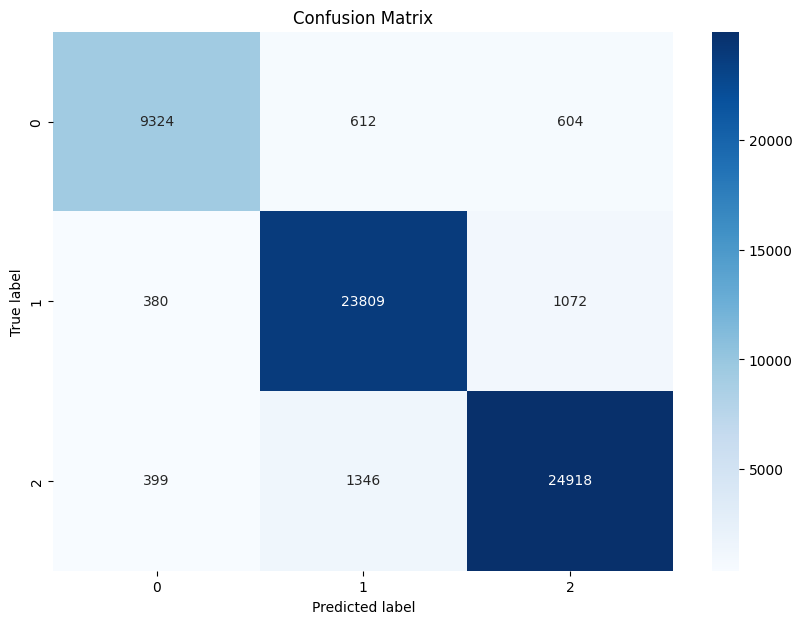

In [ ]:
# Convert one-hot encoded predictions and labels to class indices
y_pred_classes = np.argmax(modelGRU.predict(x_val), axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Binarize the labels for ROC calculation
y_test_binarized = label_binarize(y_test, classes=[negative, neutral, positive])
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_score = modelGRU.predict(x_test)  # Ensure this gives you the probability for each class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
base_path_model = "/content/drive/MyDrive/Thesis/"
accuracy = "_92"

path_modelGRU = base_path_model + model_name + accuracy + ".h5"
modelGRU.save(path_modelGRU)
print(path_modelGRU)

/content/drive/MyDrive/Thesis/GRU_model2_92.h5
/content/drive/MyDrive/Thesis/GRU_model2_92.h5


In [ ]:
cnn_metrics = {
    'accuracy': 0.90,
    'loss': 0.30,
    'precision': 0.91,
    'f1_score': 0.90
}

gru_metrics = {
    'accuracy': 0.91,
    'loss': 0.28,
    'precision': 0.92,
    'f1_score': 0.91
}

hybrid_metrics = {
    'accuracy': 0.91,
    'loss': 0.29,
    'precision': 0.91,
    'f1_score': 0.91
}

In [ ]:
metrics = {
    'CNN': cnn_metrics,
    'GRU': gru_metrics,
    'Hybrid': hybrid_metrics
}

# Create a list of metrics names for plotting
metric_names = list(cnn_metrics.keys())

# Prepare data for plotting
models = list(metrics.keys())
data = np.array([[metrics[model][metric] for metric in metric_names] for model in models])

# Create the bar chart
x = np.arange(len(metric_names))  # the label locations
width = 0.25

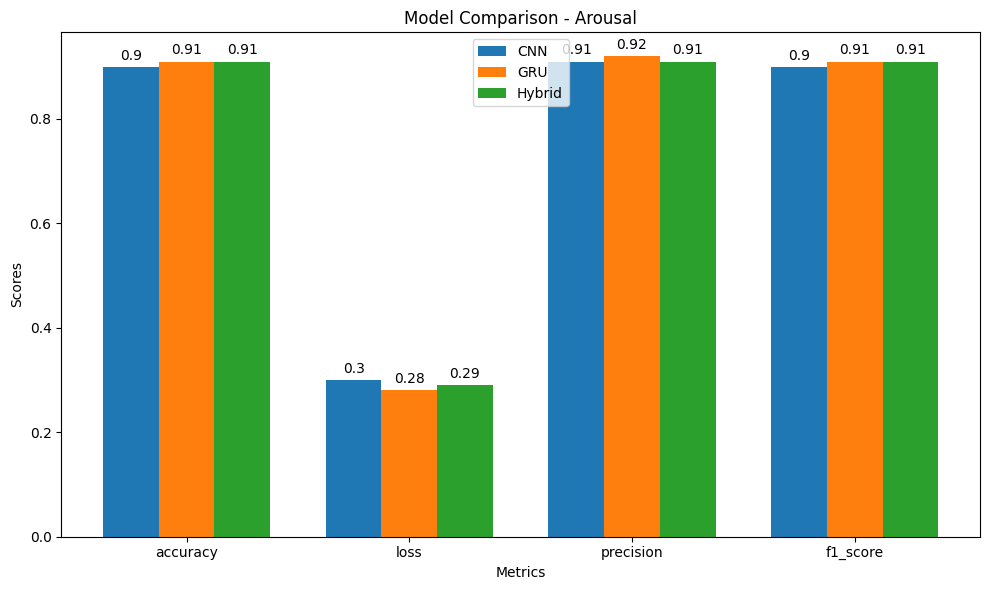

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, data[0], width, label='CNN')
rects2 = ax.bar(x, data[1], width, label='GRU')
rects3 = ax.bar(x + width, data[2], width, label='Hybrid')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison - Arousal')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()